<div class="alert alert-block alert-info">
<H2> Notebook Instructions </H2><BR>
1. Press <mark>Shift</mark> + <mark>Enter</mark> to run the cells.<BR>
2. All the Jupyter notebook and data files can be downloaded from the LMS. Please prefix your query with <mark>Support</mark> if you are facing issues in locating the files. If you are watching offline, then reach out to your support manager at <mark>support@quantinsti.com.</mark><BR>
3. If you are new to Jupyter notebook, then read <a href= "https://blog.quantinsti.com/jupyter-notebook-tutorial-installation-components-magic-commands/">this guide</a>.
</div>

In [1]:
import warnings
warnings.simplefilter('ignore')

# Define period of backtesting
from datetime import date
start_date = date(2017, 1, 1)
end_date = date(2023, 7, 13)

# Define instrument list
instrument_list = [
    'LICHSGFIN.NS',
    'HDFCBANK.NS',
    'ASIANPAINT.NS',
    'BAJFINANCE.NS',
    'POWERGRID.NS',
    'RELIANCE.NS',
    'KOTAKBANK.NS',
    'NESTLEIND.NS',
    'AMBUJACEM.NS',
    'BHARTIARTL.NS',
    'TCS.NS',
    'INFY.NS',
    'WIPRO.NS',
    'BPCL.NS',
    'ITC.NS',
    'MARUTI.NS',
    'TATASTEEL.NS'
]

In [2]:
# Import the libraries and modules required in the strategy
from data import get_stock_data
from alpha import ma_crossover, compute_adx
import pandas as pd
from performance_analytics import compute_ret

short_lookback = 2
long_lookback = 7

portfolio = pd.DataFrame()

for instrument_name in instrument_list:
    try:
        # Fetch data
        data = get_stock_data(instrument_name, start_date, end_date)
        data = ma_crossover(data, short_lookback, long_lookback)
        data = compute_adx(data, 20)
        #print(instrument_name, data.iloc[-1])

        # Alphas
        data = data.dropna()
        data['signal'] = data['ma_signal'] * data['adx_signal']

        # Calculate the returns
        data = compute_ret(data)
        portfolio['ret_'+instrument_name] = data.strategy_ret
    except Exception as e:
        print(e, instrument_name)

portfolio.iloc[-5:, :5]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,ret_LICHSGFIN.NS,ret_HDFCBANK.NS,ret_ASIANPAINT.NS,ret_BAJFINANCE.NS,ret_POWERGRID.NS
Date,,,,,
2023-07-06,0.011429,0.001016,0.007409,NaN,0.037315
2023-07-07,-0.021092,-0.000000,-0.016385,NaN,-0.027598
2023-07-10,0.000000,-0.000000,-0.000165,NaN,-0.021335
2023-07-11,0.000000,-0.000000,0.000000,NaN,0.000000
2023-07-12,-0.000000,-0.000000,0.004186,NaN,-0.000000


In [3]:
portfolio['strategy_ret'] = portfolio.mean(axis=1)
portfolio.strategy_ret.head()

Date
2017-02-09         NaN
2017-02-10    0.001025
2017-02-13    0.001286
2017-02-14   -0.001191
2017-02-15   -0.003762
Name: strategy_ret, dtype: float64

## Performance Analysis

Start date,2017-02-09
End date,2023-07-12
Total months,75
,Backtest
Annual return,6.5%
Cumulative returns,48.6%
Annual volatility,6.4%
Sharpe ratio,1.02
Calmar ratio,0.81
Stability,0.87
Max drawdown,-8.0%


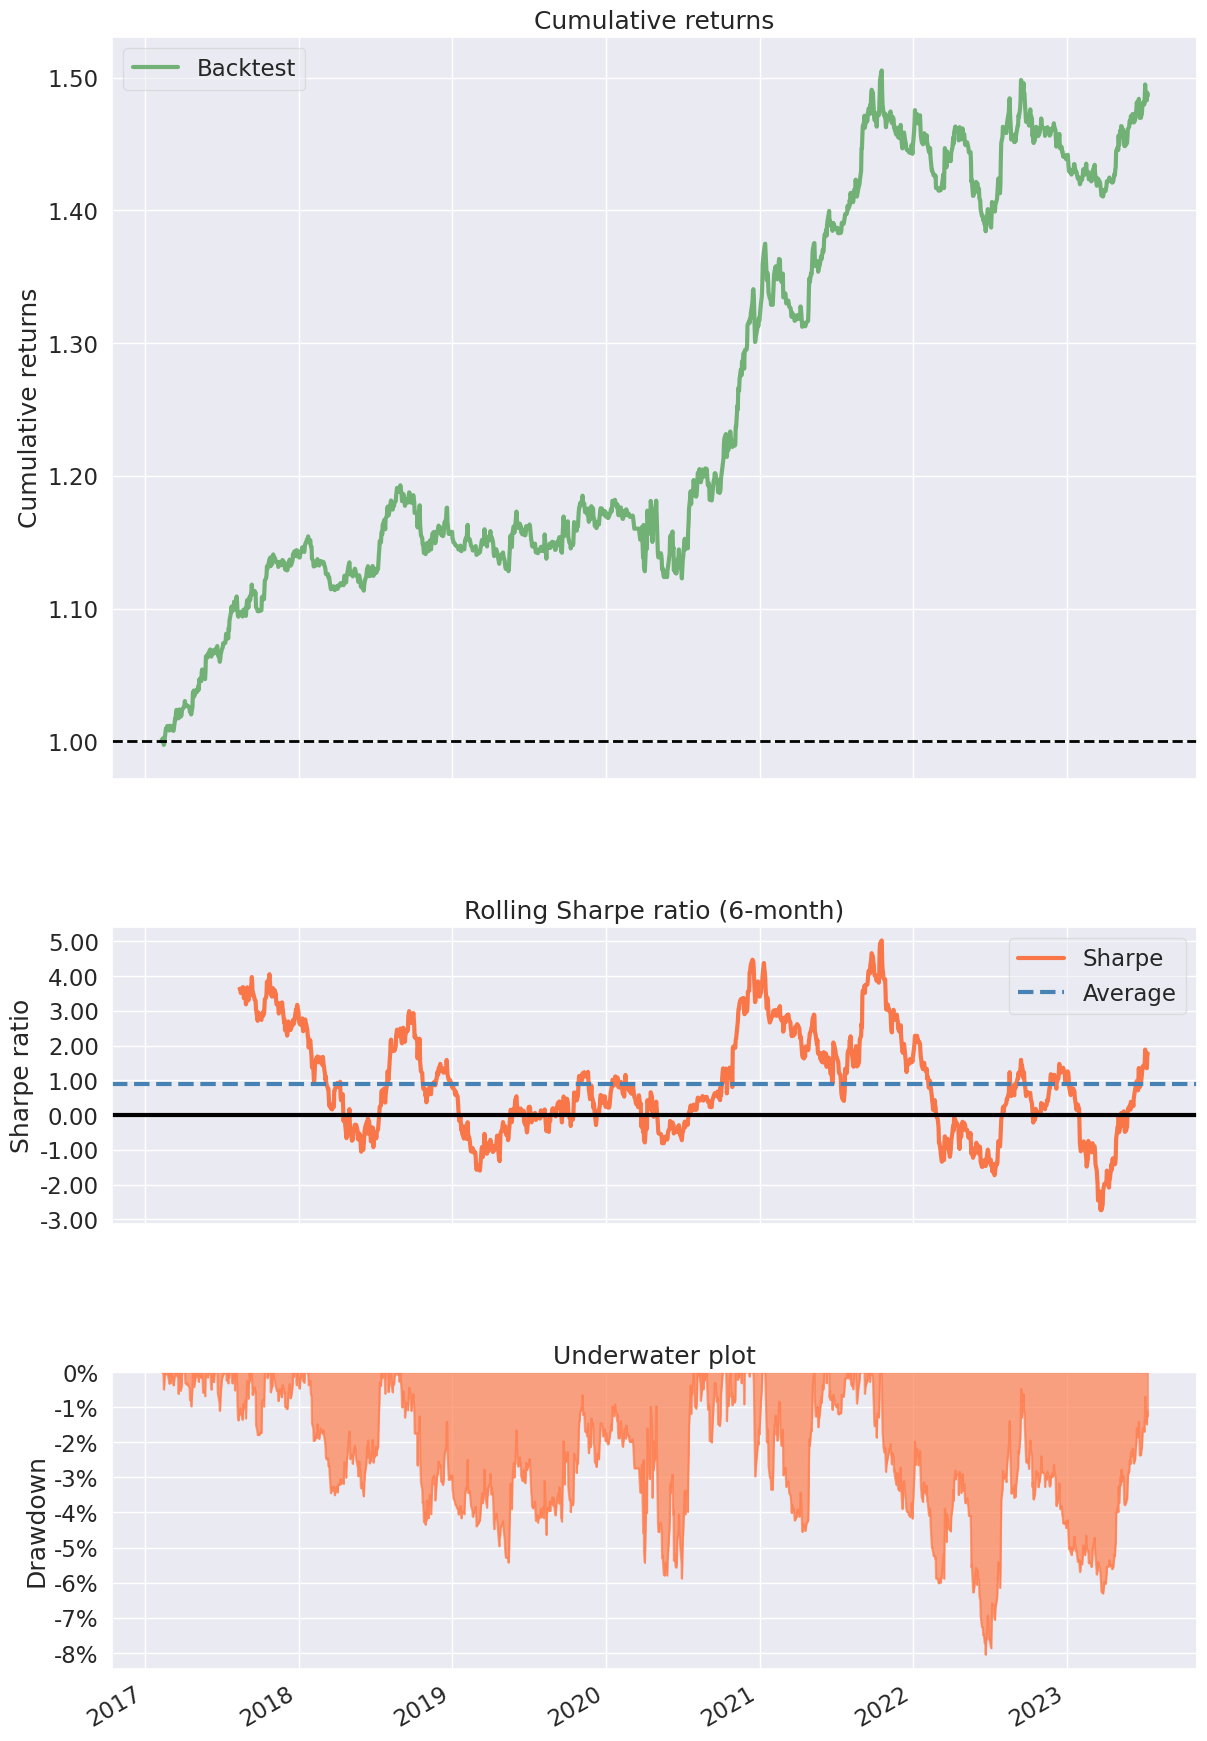

In [4]:
import pyfolio as pf
pf.create_simple_tear_sheet(portfolio.strategy_ret)